In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
# Define paths
train_dir = r'C:\Users\shiva\OneDrive\Desktop\TRY PART 2\image\Agricultural-crops'
IMG_WIDTH, IMG_HEIGHT = 224, 224 # MobileNetV2 prefers 224x224 input
BATCH_SIZE = 32

# Create ImageDataGenerator (same as before)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

num_classes = train_generator.num_classes
class_names = list(train_generator.class_indices.keys())
print(f"Found {num_classes} classes: {class_names}")

# Load the MobileNetV2 base model with pre-trained ImageNet weights
base_model = MobileNetV2(
    input_shape=(IMG_WIDTH, IMG_HEIGHT, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model's layers to prevent them from being updated during training
base_model.trainable = False

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\shiva\\OneDrive\\Desktop\\TRY PART 2\\image\\Agricultural-crops'

In [ ]:
# Create the new classification head
x = base_model.output
x = GlobalAveragePooling2D()(x) # This layer effectively flattens the output of the base model
x = Dense(128, activation='relu')(x) # A new dense layer for classification
predictions = Dense(num_classes, activation='softmax')(x) # Final output layer

# Combine the base model and the new head into a single model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,425,822 (9.25 MB)

 Trainable params: 167,838 (655.62 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Train the model
EPOCHS = 10 # Start with a lower number of epochs, as this trains faster

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

# Evaluate the final accuracy
final_accuracy = model.evaluate(validation_generator)[1]
print(f"Final model accuracy: {final_accuracy*100:.2f}%")



c:\Users\shiva\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.1513 - loss: 3.1917 - val_accuracy: 0.2516 - val_loss: 2.6755
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4139 - loss: 2.1758 - val_accuracy: 0.4129 - val_loss: 2.1484
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6039 - loss: 1.4801 - val_accuracy: 0.5355 - val_loss: 1.8754
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6914 - loss: 1.1454 - val_accuracy: 0.5290 - val_loss: 1.7098
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7092 - loss: 1.0056 - val_accuracy: 0.5484 - val_loss: 1.5508
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7938 - loss: 0.7965 - val_accuracy: 0.5226 - val_loss: 1.4917
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8309 - loss: 0.6679 - val_accuracy: 0.5677 - val_loss: 1.5174
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8175 - loss: 0.6967 - val_accuracy: 0.5484 - val_loss:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels from the validation generator
# This will give you one batch of images, typically 32 images,
# that the model has not seen during training.
image_batch, label_batch = next(iter(validation_generator))

# Use the trained model to make predictions on the batch
predictions = model.predict(image_batch)

# Convert the predictions (probabilities) and actual labels
# from one-hot encoded format to class indices
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(label_batch, axis=1)

# Get the list of class names to map indices to names
class_names = list(train_generator.class_indices.keys())

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


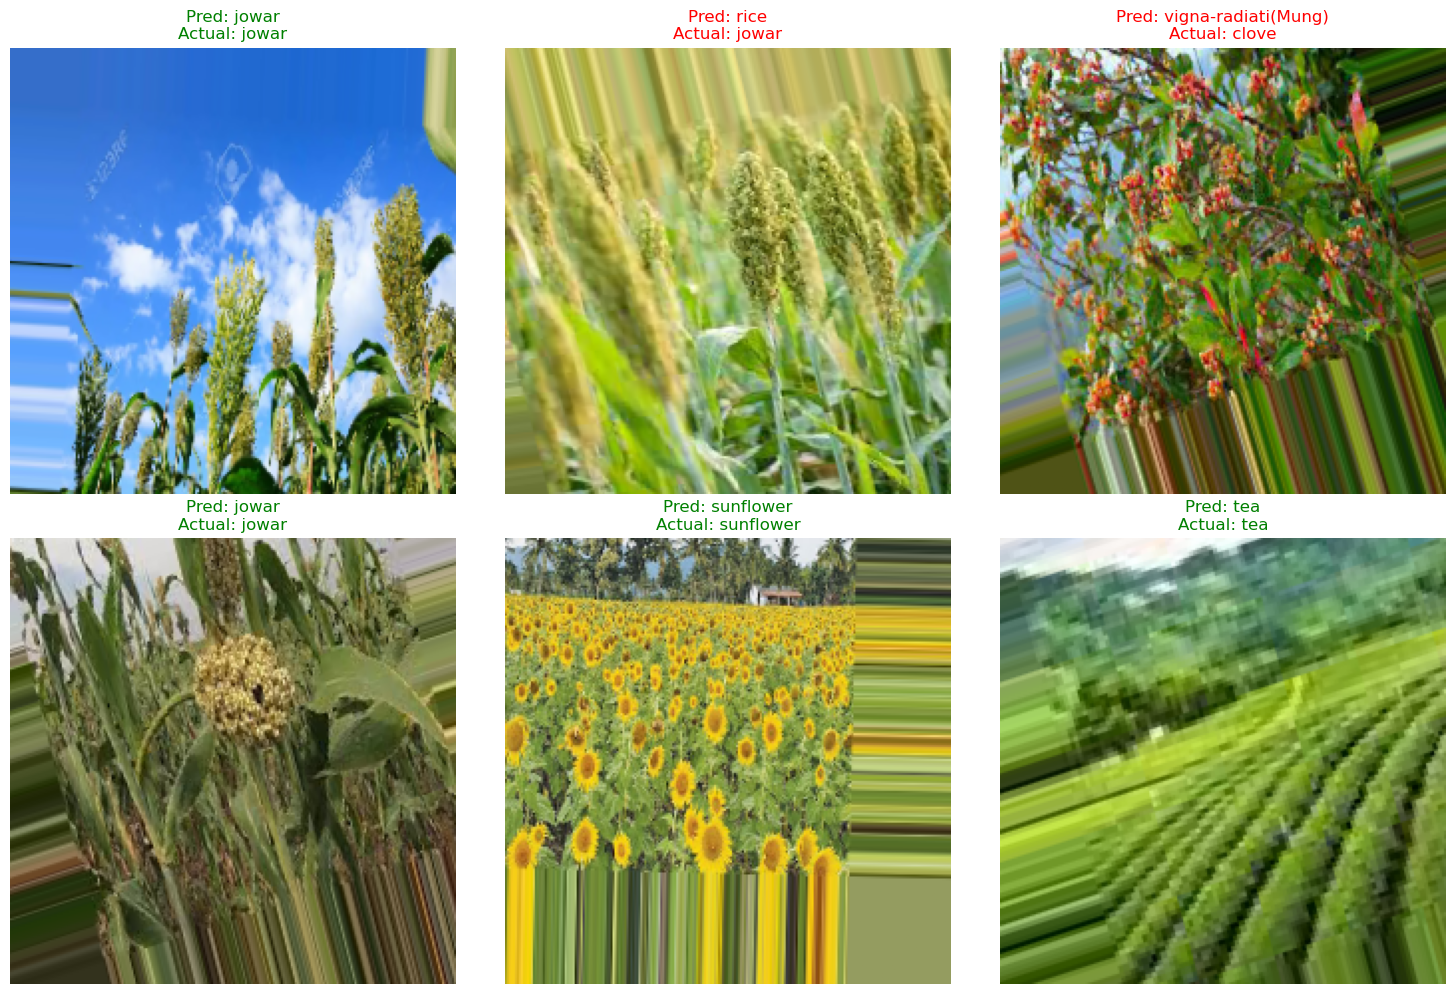

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels from the validation generator
# 'validation_generator' should be the ImageDataGenerator you used for validation
image_batch, label_batch = next(iter(validation_generator))

# Make predictions on the image batch
predictions = model.predict(image_batch)

# Convert predictions and labels from one-hot encoded format to class indices
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(label_batch, axis=1)

# Get the list of class names from the generator
class_names = list(train_generator.class_indices.keys())

# Create a figure for the 6 plots
plt.figure(figsize=(15, 10))

# Loop through the first 6 images in the batch and plot them
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    
    # Display the image
    plt.imshow(image_batch[i])
    
    # Get the predicted and actual labels as strings
    predicted_label = class_names[predicted_classes[i]]
    actual_label = class_names[actual_classes[i]]
    
    # Create the title text
    title_text = f"Pred: {predicted_label}\nActual: {actual_label}"
    
    # Set the title color based on whether the prediction is correct
    color = "green" if predicted_label == actual_label else "red"
    ax.set_title(title_text, color=color, fontsize=12)
    
    # Turn off the axes for a cleaner look
    ax.axis("off")

# Adjust layout to prevent titles from overlapping
plt.tight_layout()
plt.show()